In [2]:
#import required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
#get mitochondrial genome informations
mtdnas=pd.read_csv('../../data/organelles.csv',index_col=0)
mtdnas=mtdnas.loc[['Mus musculus LP/J','Mus musculus C3H/HeJ','Mus musculus BALB/cJ','Mus musculus A/J',
                  'Mus musculus castaneus CAST/EiJ','Mus musculus NOD/ShiLtJ','Mus musculus domesticus AKR/J',
                  'Mus musculus domesticus WSB/EiJ','Mus musculus DBA/2J','Mus musculus 129S1/SvImJ',
                  'Mus musculus musculus PWK/PhJ','Mus musculus CBA/J','Mus musculus NZO/HiLtJ',
                  'Mus musculus FVB/NJ','Mus musculus C57BL/6NJ','Mus spretus SPRET/EiJ']]
mtdnas=mtdnas[~mtdnas.index.duplicated(keep='first')]
mtdnas.index=pd.Series(mtdnas.index.values).apply(lambda name:name.split(' ')[-1].lower().replace('/',''))

In [3]:
#load numts csv files
def read_dfs(filename):
    try:
        df=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/csvs/{filename}')
        return df
    except:
        return np.nan
    
dfs=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(read_dfs)
dfs.index=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(lambda filename:filename[:-10])
dfs=dfs.dropna()
dfs

Mus_musculus_lpj                score      eg2_value        e_value g_id ...
Mus_musculus_c3hhej             score      eg2_value        e_value g_id ...
Mus_musculus_balbcj             score      eg2_value        e_value g_id ...
Mus_musculus_aj                 score  eg2_value   e_value g_id   g_start...
Mus_musculus_casteij            score      eg2_value        e_value g_id ...
Mus_musculus_nodshiltj          score      eg2_value        e_value g_id ...
Mus_musculus_akrj               score      eg2_value        e_value g_id ...
Mus_musculus_wsbeij             score      eg2_value        e_value g_id ...
Mus_musculus_dba2j              score      eg2_value        e_value g_id ...
Mus_musculus_129s1svimj         score      eg2_value        e_value g_id ...
Mus_musculus_pwkphj             score      eg2_value        e_value g_id ...
Mus_musculus                    score      eg2_value        e_value g_id ...
Mus_musculus_cbaj               score      eg2_value        e_value g_id ...

In [4]:
def add_label(subdf):
    global indicer
    subdf['label']=len(subdf)*[indicer]
    indicer+=1
    
indicer=0
dfs.apply(add_label)

Mus_musculus_lpj           None
Mus_musculus_c3hhej        None
Mus_musculus_balbcj        None
Mus_musculus_aj            None
Mus_musculus_casteij       None
Mus_musculus_nodshiltj     None
Mus_musculus_akrj          None
Mus_musculus_wsbeij        None
Mus_musculus_dba2j         None
Mus_musculus_129s1svimj    None
Mus_musculus_pwkphj        None
Mus_musculus               None
Mus_musculus_cbaj          None
Mus_musculus_fvbnj         None
Mus_musculus_c57bl6nj      None
Mus_musculus_nzohiltj      None
Mus_musculus_spreteij      None
dtype: object

In [5]:
df=pd.concat(dfs.tolist())
df.head(n=3)

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,label
0,2464,0.0,0.0,4,79861757,12489,2871,2869,+,+,160599618,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,0
1,719,0.0,0.0,5,85796228,4846,1591,1594,+,+,158326599,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,0
2,695,0.0,0.0,4,6615132,3198,1326,1316,+,+,160599618,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,0


In [19]:
df['g_GC']=df['g_sequence'].apply(lambda seq:(seq.upper().count('G')+seq.upper().count('C'))/len(seq))
df['mt_GC']=df['mt_sequence'].apply(lambda seq:(seq.upper().count('G')+seq.upper().count('C'))/len(seq))
df.head(n=3)

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,label,g_GC,mt_GC
0,2464,0.0,0.0,4,79861757,12489,2871,2869,+,+,160599618,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,0,0.365726,0.375131
1,719,0.0,0.0,5,85796228,4846,1591,1594,+,+,158326599,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,0,0.337638,0.381304
2,695,0.0,0.0,4,6615132,3198,1326,1316,+,+,160599618,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,0,0.327082,0.369092


In [33]:
g_id_fil=df['g_id'].apply(lambda g_id:g_id not in ['X', 'LVXS01064015.1', 'MT',
       'LVXQ01064553.1', 'LVXQ01065690.1', 'LVXM01049178.1'])
updated_df=df[g_id_fil]

In [34]:
X=updated_df[['g_id','score','eg2_value','e_value','g_start','g_length','g_size','g_GC','mt_GC']]
y=updated_df['label']

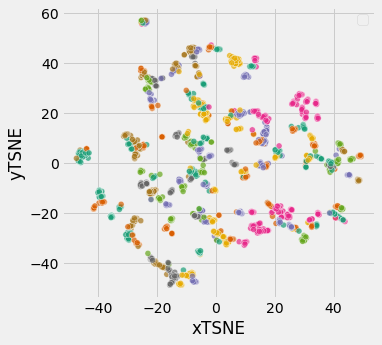

In [74]:
plt.style.use('fivethirtyeight')
X_normalized=StandardScaler().fit(X[['score','eg2_value','e_value','g_start','g_length','g_size','g_GC','mt_GC']]).transform(X[['score','eg2_value','e_value','g_start','g_length','g_size','g_GC','mt_GC']])
tsne = TSNE(random_state = 0,perplexity=50)
X_tsne = tsne.fit_transform(X_normalized)
X['xTSNE']=X_tsne[:,0]
X['yTSNE']=X_tsne[:,1]
X['label']=y
fig,axs=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(
    x='xTSNE',
    y='yTSNE',
    hue='g_id',
    data=X,
    palette='Dark2',
    alpha=.7,
    ax=axs
)
plt.legend([])

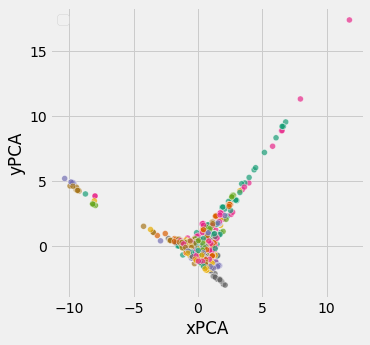

In [75]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_normalized)
X_pca = pca.transform(X_normalized)
X['xPCA']=X_pca[:,0]
X['yPCA']=X_pca[:,1]
fig,axs=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(
    x='xPCA',
    y='yPCA',
    hue='g_id',
    data=X,
    palette='Dark2',
    alpha=.7,
    ax=axs
)
plt.legend([])

In [76]:
from sklearn.manifold import MDS 

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

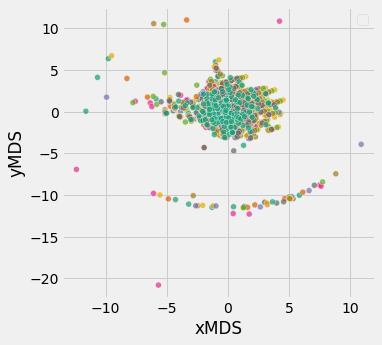

In [78]:
X['xMDS']=X_mds[:,0]
X['yMDS']=X_mds[:,1]
fig,axs=plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(
    x='xMDS',
    y='yMDS',
    hue='label',
    data=X,
    palette='Dark2',
    alpha=.7,
    ax=axs
)
plt.legend([])

In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=18,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(X_normalized)

KMeans(init='random', n_clusters=18, random_state=42)

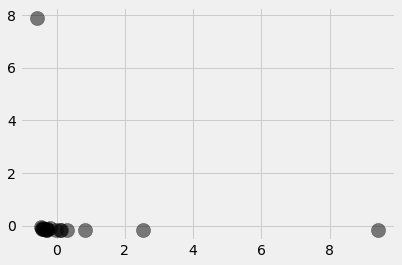

In [109]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);